In [150]:
# Adjascency List representation in Python
from itertools import combinations
from random import random
import numpy as np
import timeit 

class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None

class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V
    
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node
        
        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")
            
    def ER(self,p):
        n = self.V
        V = set([v for v in range(n)])
        for combination in combinations(V, 2):
            if random() <= p:
                self.add_edge(combination[0],combination[1])

    ## origin
    def BFS(self,s):
        level = 0
        neighbor = []
        visited = set()    
        visited.add(s)
        graph = self.graph
        
        node = graph[s]
        level = 0
        n = []
        while(node != None):
            neighbor.append(node.vertex)
            visited.add(node.vertex)
            node = node.next
        #print(neighbor)   
        while(neighbor != []):
            while(neighbor != []):
                a = neighbor.pop()
                node = graph[a] 
                while(node != None):
                    b = node.vertex
                    if b not in visited :
                        n.append(b)
                        visited.add(b)
                    node = node.next
            neighbor = n 
            n = []
            #print(neighbor)    
            level = level + 1
        return (level - 1)
    
    
    ## change code
    def BFS2(self, root):
        graph = self.graph
        current_level = []
        current_level.append(root)
        level = 0;
        vs = set();
        vs.add(root)
        connect = 0
        while(current_level != []):
            new =[]
            for neigh in current_level:
                node = graph[neigh]
                while(node != None):
                    d = node.vertex
                    if(d not in vs) :
                        vs.add(d)
                        new.append(d)
                    node = node.next
            current_level = new           
            level = level + 1  
        
        if(len(vs) == self.V): connect = 1
        level = level - 1
        return level, connect  
            
    def max_diameter(self):
        max_ = 0
        a = 0
        connect = 0
        for i in range(self.V):
            a, connect = self.BFS2(i) 
            max_ = max(max_,a)
        return a, connect
            
if __name__ == "__main__":
    V = 10


#### print(x)

In [86]:
 graph.print_agraph()

Vertex 0: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 

Vertex 1: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 0 

Vertex 2: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 1 -> 0 

Vertex 3: -> 9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 2 -> 1 -> 0 

Vertex 4: -> 9 -> 8 -> 7 -> 6 -> 5 -> 3 -> 2 -> 1 -> 0 

Vertex 5: -> 9 -> 8 -> 7 -> 6 -> 4 -> 3 -> 2 -> 1 -> 0 

Vertex 6: -> 9 -> 8 -> 7 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 

Vertex 7: -> 9 -> 8 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 

Vertex 8: -> 9 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 

Vertex 9: -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0 



In [117]:
p = np.arange(0.001,0.03,0.001)
x = np.zeros(len(p))

graph = Graph(1000)
for i in range(len(p)):
    print(p[i])
    graph.ER(p[i])
    x[i] = graph.max_diameter()



0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011
0.012
0.013000000000000001
0.014000000000000002
0.015
0.016
0.017
0.018000000000000002
0.019000000000000003
0.02
0.021
0.022000000000000002
0.023
0.024
0.025
0.026000000000000002
0.027000000000000003
0.028
0.029


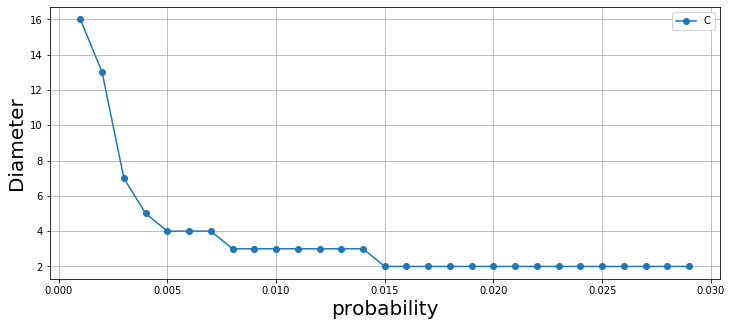

In [120]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize = (12,5))



plt.grid(True)
plt.plot(p,x,'o-', label = 'C')
plt.legend()
plt.xlabel('probability',fontsize = 20)
plt.ylabel('Diameter',fontsize = 20)
plt.savefig('problem6_1.jpg')

In [121]:
np.savetxt('p.txt', p)
np.savetxt('x.txt', x)

0.0002
0.00030000000000000003
0.0004000000000000001
0.0005
0.0006000000000000001
0.0007000000000000001
0.0008
0.0009000000000000001


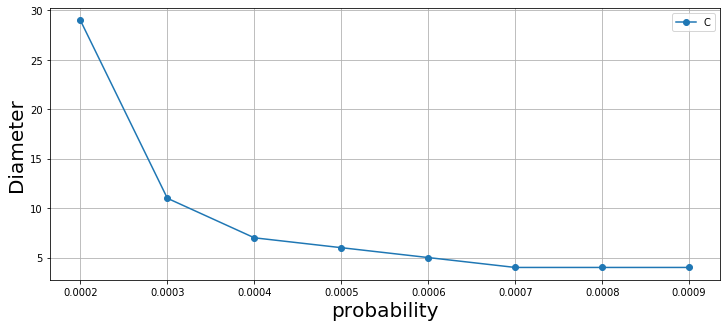

In [133]:
p2 = np.arange(0.0002,0.001,0.0001)
x2 = np.zeros(len(p2))

graph = Graph(10000)
for i in range(len(p2)):
    print(p2[i])
    graph.ER(p2[i])
    x2[i] = graph.max_diameter()
    
ax = plt.figure(figsize = (12,5))
plt.grid(True)
plt.plot(p2,x2,'o-', label = 'C')
plt.legend()
plt.xlabel('probability',fontsize = 20)
plt.ylabel('Diameter',fontsize = 20)
plt.savefig('problem6_1.jpg')

In [127]:
print(p2)
print(x2)

[0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009]
[ 3.  9. 32. 37. 23. 16. 12. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [134]:
np.savetxt('p2.txt', p2)
np.savetxt('x2.txt', x2)

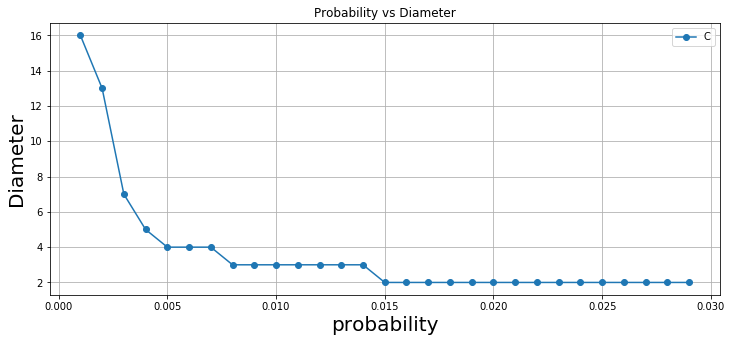

In [181]:
ax = plt.figure(figsize = (12,5))
p2 = np.loadtxt('p.txt')
x2 = np.loadtxt('x.txt')


plt.grid(True)
plt.plot(p2,x2,'o-', label = 'C')
plt.legend()
plt.title('Probability vs Diameter')
plt.xlabel('probability',fontsize = 20)
plt.ylabel('Diameter',fontsize = 20)
plt.savefig('problem6_2.jpg')

2.5e-05
7.500000000000001e-05
0.00012500000000000003
0.00017500000000000003


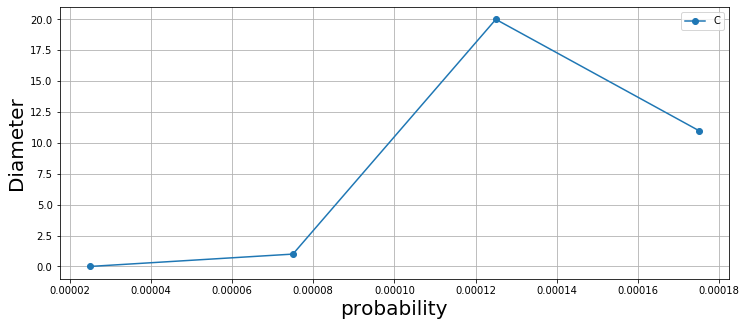

In [154]:
import matplotlib.pyplot as plt
p3 = np.arange(0.000025,0.0002,0.00005)
x3 = np.zeros(len(p3))
q3 = np.zeros(len(p3))
graph = Graph(10000)
for i in range(len(p3)):
    print(p3[i])
    graph.ER(p3[i])
    x3[i],q3[i] = graph.max_diameter()
    
ax = plt.figure(figsize = (12,5))
plt.grid(True)
plt.plot(p3,x3,'o-', label = 'C')
plt.legend()
plt.xlabel('probability',fontsize = 20)
plt.ylabel('Diameter',fontsize = 20)
plt.savefig('problem6_1.jpg')


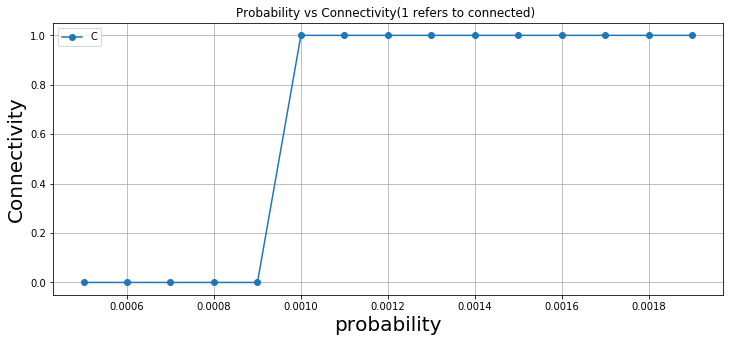

In [178]:
import networkx as nx

# g = nx.fast_gnp_random_graph(10000,0.0025)

# nx.is_connected(g)

import matplotlib.pyplot as plt
p3 = np.arange(0.0005,0.0020,0.0001)
x3 = np.zeros(len(p3))

for i in range(len(p3)):
    g = nx.fast_gnp_random_graph(10000,p3[i])
    n = nx.is_connected(g)
    if(n == True):
        x3[i] = 1
    
ax = plt.figure(figsize = (12,5))
plt.grid(True)
plt.plot(p3,x3,'o-', label = 'C')
plt.legend()
plt.xlabel('probability',fontsize = 20)
plt.ylabel('Connectivity',fontsize = 20)
plt.title('Probability vs Connectivity(1 refers to connected) ')
plt.savefig('problem6_1.jpg')

